## EDA INTRO

In [43]:
#import dataset and convert it into dafaframe
import ast
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

In [20]:
#data cleaning 
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

##### Filter for US Data Analyst roles

In [33]:
df_us_da = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]

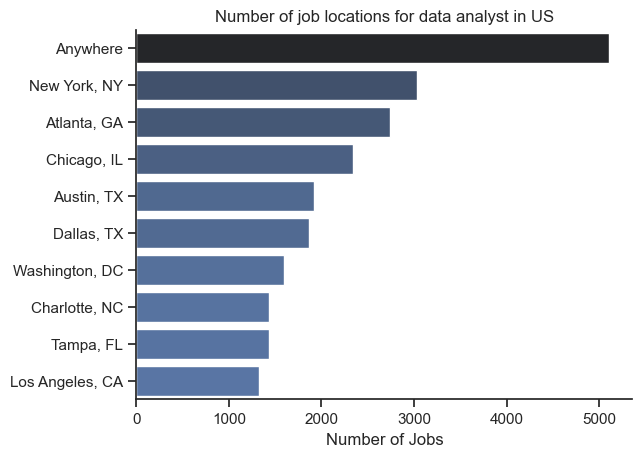

In [55]:
#bar plot 
df_plot = df_us_da['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,y='job_location',x='count',hue='count',palette='dark:b_r',legend=False)
sns.despine() #to remove border around the bgraph
plt.title('Number of job locations for data analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

##### Pie Charts

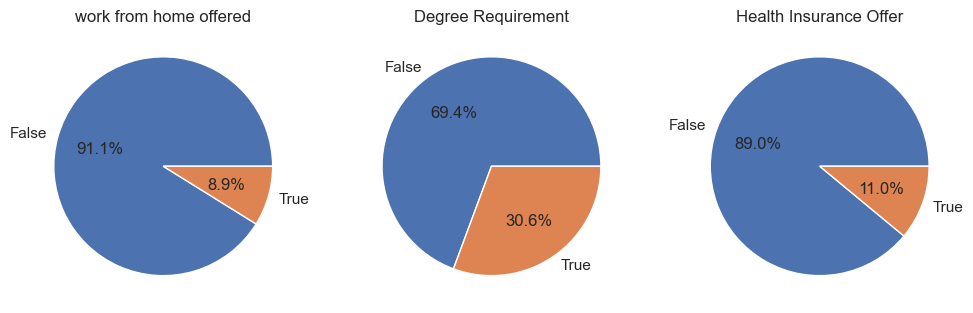

In [61]:
dict_column = {
    'job_work_from_home':'work from home offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offer'
}

fig,ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),labels=['False','True'],autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()

#### Companies

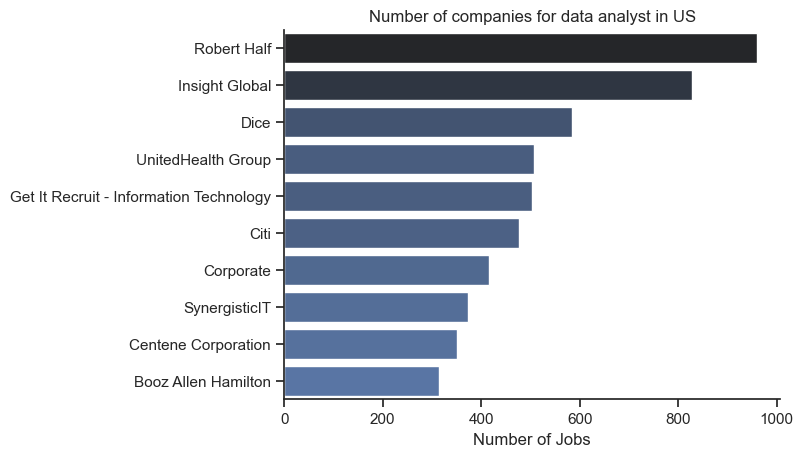

In [62]:
#bar plot 
df_plot = df_us_da['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,y='company_name',x='count',hue='count',palette='dark:b_r',legend=False)
sns.despine() #to remove border around the bgraph
plt.title('Number of companies for data analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()